Tutorial 3: Inversions

We’ve covered Mapper’s, which, if I haven’t emphasised it enough yet, map things. Now, we’re going to look at how we can use these Mapper’s (which map things) to reconstruct the source galaxy - I hope you’re excited!

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


We’ll use the same strong lensing data as the previous tutorial, where:

    The lens galaxy’s light is omitted.
    The lens galaxy’s MassProfile is an PointMass2.
    The source galaxy’s LightProfile is an EllipticalSersic.


In [3]:
dataset_path = f"{workspace_path}/howtolens/PointMass2/Data"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)


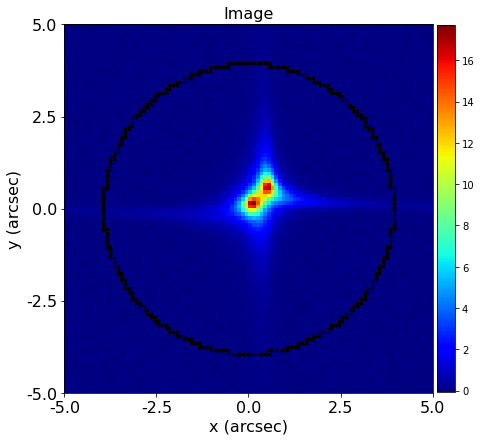

In [23]:
mask = al.Mask.circular(
    shape_2d=imaging.shape_2d,
    pixel_scales=imaging.pixel_scales,
    radius=4,
)


aplt.Imaging.image(imaging=imaging, mask=mask)

Next, lets set the Imaging and Mask up as a MaskedImaging object and setup a Tracer using the input lens galaxy model (we don’t need to provide the source’s LightProfile, as we’re using a Mapper to reconstruct it).

In [24]:
masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.PointMass2(
        centre=(0.0, 0.0), einstein_radius=1.6
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, al.Galaxy(redshift=1.0)])

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=masked_imaging.grid)[1]


We’ll use another rectangular Pixelization and Mapper to perform the reconstruction.

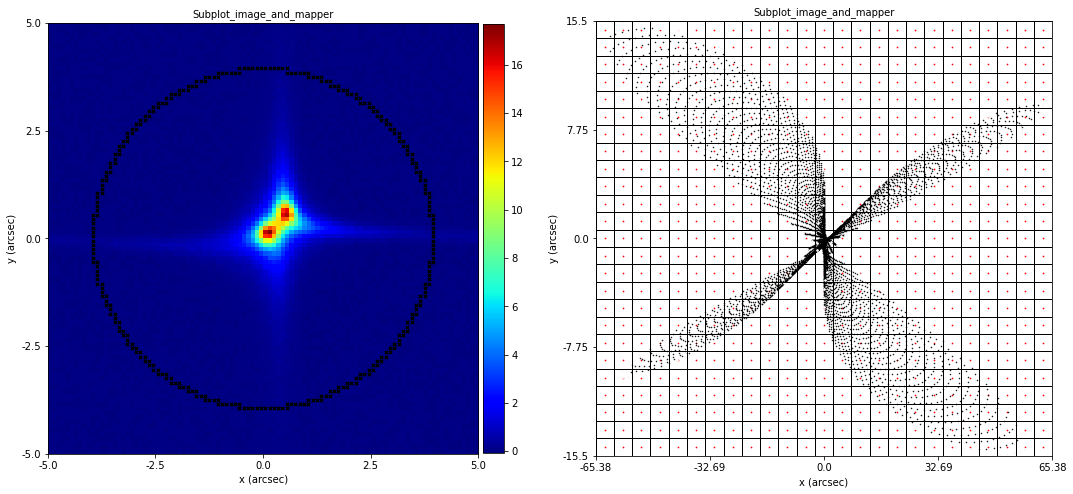

In [25]:
rectangular = al.pix.Rectangular(shape=(25, 25))

mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

aplt.Mapper.subplot_image_and_mapper(
    image=imaging.image,
    mapper=mapper,
    include=aplt.Include(mask=True, inversion_grid=True),
)

And now, finally, we’re going to use our Mapper to invert the image using an Inversion. I’ll explain how this works in a second - but lets just go ahead and use the Inversion first. (Ignore the ‘regularization’ input below for now, we’ll cover this in the next tutorial).

In [26]:
inversion = al.Inversion(
    masked_dataset=masked_imaging,
    mapper=mapper,
    regularization=al.reg.Constant(coefficient=1.0),
)

Our Inversion has a reconstructed image and Pixeilzation, which we can plot using an Inversion plotter

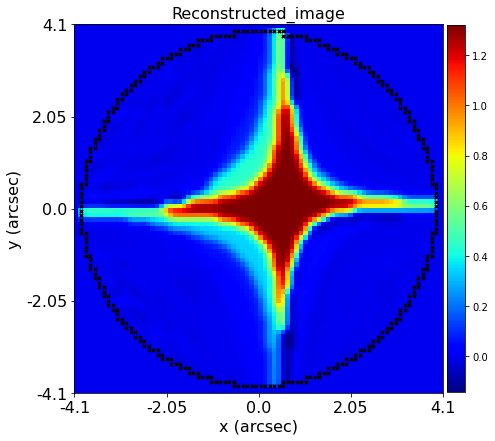

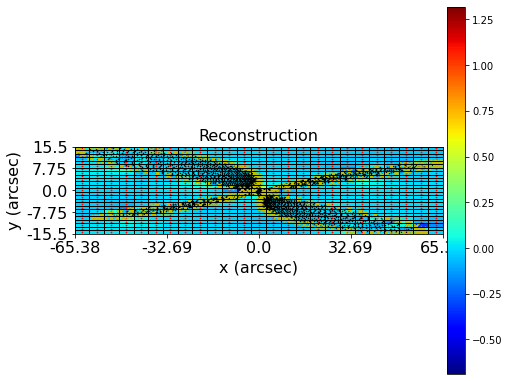

<Figure size 432x288 with 0 Axes>

In [36]:
aplt.Inversion.reconstructed_image(inversion=inversion, include=aplt.Include(mask=True))

aplt.Inversion.reconstruction(
    inversion=inversion, include=aplt.Include(inversion_grid=True)
)
import matplotlib.pyplot as plt
plt.savefig('Inversion.png')

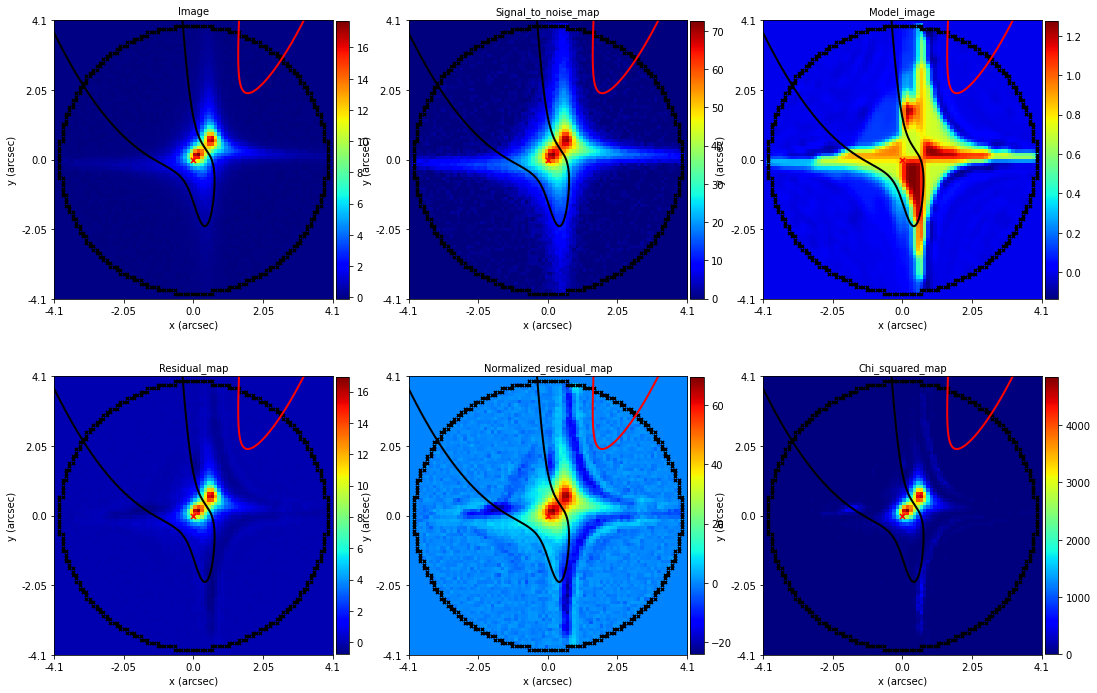

In [34]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    pixelization=al.pix.Rectangular(shape=(40, 40)),
    regularization=al.reg.Constant(coefficient=5.0),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

aplt.FitImaging.subplot_fit_imaging(fit=fit, include=aplt.Include(mask=True))

